## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo2mesh.misc import viewer
from tomo2mesh import DataFile
from skimage.filters import threshold_otsu
from tomo2mesh import Voids
import os
from tomo2mesh.projects.steel_am.rw_utils import *
import seaborn as sns

In [2]:
sns.set(font_scale=1.2)
sns.set_style(style='white')

In [3]:
Vx = DataFile('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/full_rec/2k_rec', tiff = True).read_full()


##################################################
Found existing tiff folder: 2k_rec
Dataset shape: (2048, 2048, 2048)


In [4]:
voids_1 = Voids().import_from_disk(os.path.join(voids_dir,f"voids_b_1"))

In [5]:
voids_2 = Voids().import_from_disk(os.path.join(voids_dir,f"c2f_2k_b_2_subset"))

In [6]:
voids_4 = Voids().import_from_disk(os.path.join(voids_dir,f"c2f_4k_b_4_subset"))

In [7]:
s1 = np.cbrt(voids_1["sizes"])*2.34
s2 = np.cbrt(voids_2["sizes"])*2.34
s4 = np.cbrt(voids_4["sizes"])*2.34

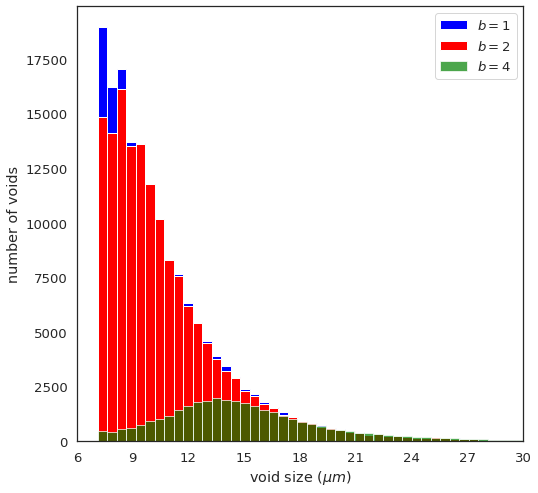

In [25]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
_ = ax.hist(s1[s1>3*2.34], bins = 500, density = False, color = 'blue', label = '$b=1$', alpha = 1)
_ = ax.hist(s2[s2>3*2.34], bins = 500, density = False, color = 'red', label = '$b=2$', alpha = 1)
_ = ax.hist(s4[s4>3*2.34], bins = 500, density = False, color = 'green', label = '$b=4$', alpha = 0.7)


ax.set_xlim([3*2.34,30])
ax.legend()
ax.set_xlabel("void size (${\mu{m}}$)")
ax.set_ylabel("number of voids")
ax.set_xticks(np.linspace(6,30,9,endpoint=True))

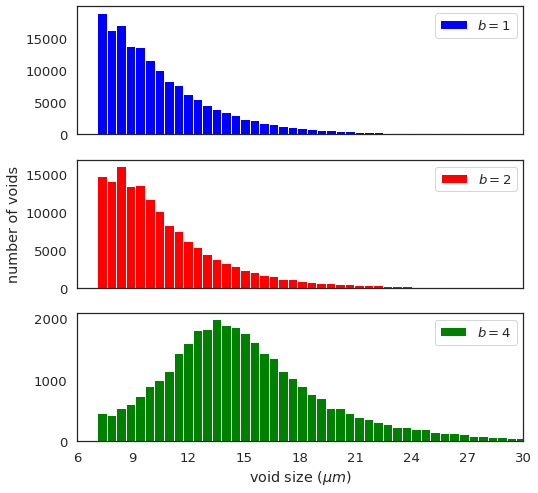

In [28]:
fig, ax = plt.subplots(3,1,figsize = (8,8), sharex = True, sharey = False)
_ = ax[0].hist(s1[s1>2.34*3], bins = 500, density = False, color = 'blue', label = '$b=1$')
_ = ax[1].hist(s2[s2>2.34*3], bins = 500, density = False, color = 'red', label = '$b=2$')
_ = ax[2].hist(s4[s4>2.34*3], bins = 500, density = False, color = 'green', label = '$b=4$')


ax[0].set_xlim([3*2.34,30])
# ax.legend()
ax[2].set_xlabel("void size (${\mu{m}}$)")
ax[1].set_ylabel("number of voids")
ax[0].set_xticks(np.linspace(6,30,9,endpoint=True))
[ax[i3].legend() for i3 in range(3)]

In [29]:
s2.size

154067

In [30]:
# with gaussian blur 202770
s2.size - np.sum(s2 == 0)

154067

In [41]:
np.sum(s2 >7)

154067

In [42]:
np.sum(s1 >7)

162634

In [43]:
np.sum(s4 >7)

34711

In [15]:
s4.size

34711

In [16]:
# with gaussian blur 37002
s4.size - np.sum(s4 == 0)

34711

In [17]:
s1.size - np.sum(s1 <= 3*2.34)

162634

In [18]:
s1.size

162634

In [19]:
def plot_void(voids, Vx, ax, ii):
    b = voids.b
    imp = viewer.get_orthoplanes(vol = voids["x_voids"][ii])
    
    

    s = voids["s_voids"][ii]
#     pad_bb = 4
#     cpt = np.asarray([s[i3].start for i3 in range(3)])
#     ept = np.asarray([s[i3].stop for i3 in range(3)])
#     cpt = np.maximum(cpt-pad_bb, 0)
#     ept = np.minimum(ept+pad_bb, np.asarray(voids.vol_shape))
#     s = tuple([slice(cpt[i3], ept[i3]) for i3 in range(3)])
    
    imx = viewer.get_orthoplanes(vol = Vx[s])
    for i3 in range(3):
        viewer.edge_plot(imx[i3], imp[i3], ax[i3], color = [255,0,0])
#         ax[i3].imshow(imx[i3], cmap = 'gray')
    
#     for ax_flat in ax.flat:
#         ax_flat.axis('off')
    ax[0].set_title(f"void id = {ii}", fontsize = 14, fontweight = "bold")
#     size = {voids_fine['sizes'][ii]} voxels
    fig.tight_layout()
    return

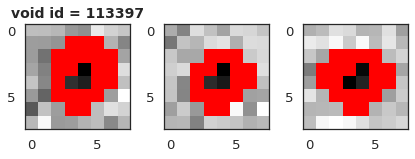

In [20]:
idxs = np.argsort(voids_1["sizes"])
fig, ax = plt.subplots(1,3, figsize = (6,6))
plot_void(voids_1, Vx, ax, idxs[20])

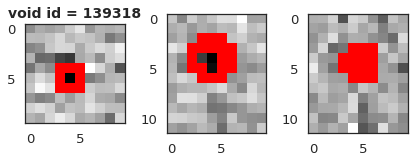

In [21]:
idxs = np.argsort(voids_2["sizes"])
fig, ax = plt.subplots(1,3, figsize = (6,6))
plot_void(voids_2, Vx, ax, idxs[0])

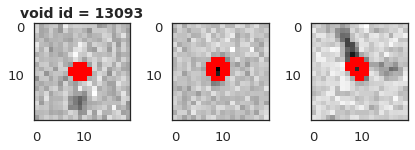

In [22]:
idxs = np.argsort(voids_4["sizes"])
fig, ax = plt.subplots(1,3, figsize = (6,6))
plot_void(voids_4, Vx, ax, idxs[0])

In [23]:
9.9+21+173+28

231.9